In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import numpy as np
import cv2

In [3]:
dataset_details = []
dataset_path = '/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'
chars = os.listdir(dataset_path)
for character in chars:
    dataset_details.append((character, len(os.listdir(os.path.join(dataset_path, character)))))

characters = sorted(dataset_details, key = lambda x : x[1], reverse = True)[:10]
characters

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079)]

(480, 320, 3)


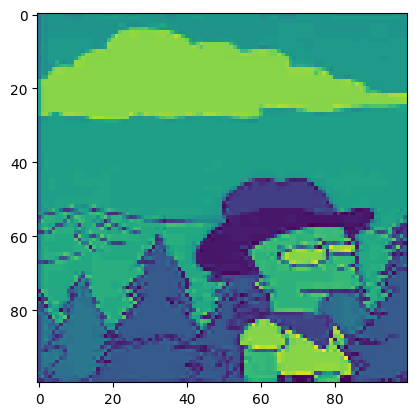

In [4]:
import matplotlib.pyplot as plt
img_path = '/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0000.jpg'
img = cv2.imread(img_path)
print(img.shape)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray_img, (100, 100))

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(resized_img)


In [5]:
images = []
labels = []
for i in range(len(characters)):
    images_path = os.path.join(dataset_path, characters[i][0])
    for path in os.listdir(images_path):
        img = cv2.imread(os.path.join(images_path, path))
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_img = cv2.resize(gray_img, (100, 100))
        images.append(gray_img)
        labels.append(i)

images = np.array(images, dtype = 'object')
labels = np.array(labels)
np.save('images.npy', images)
np.save('labels.npy', labels)

In [6]:
os.listdir('/kaggle/working/')

['images.npy', '.virtual_documents', 'labels.npy']